In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [4]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# lets check the species 
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
# lets check the missing values 
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
# lets get rip off rows with missing values --> row 3 should disappear 
df = df.dropna()

In [8]:
# no more NaN values in rows 
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
# its good practice to check all values of features --> ". " is not a sex ? 
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
# lets check were is it "."

df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
# lets figure out the sex of the missing penguin

df[df["species"] == "Gentoo"].groupby("sex").describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [14]:
# based on the data the "." penguin is a FEMALE --> Lets change it

df.at[336,"sex"] = "FEMALE"

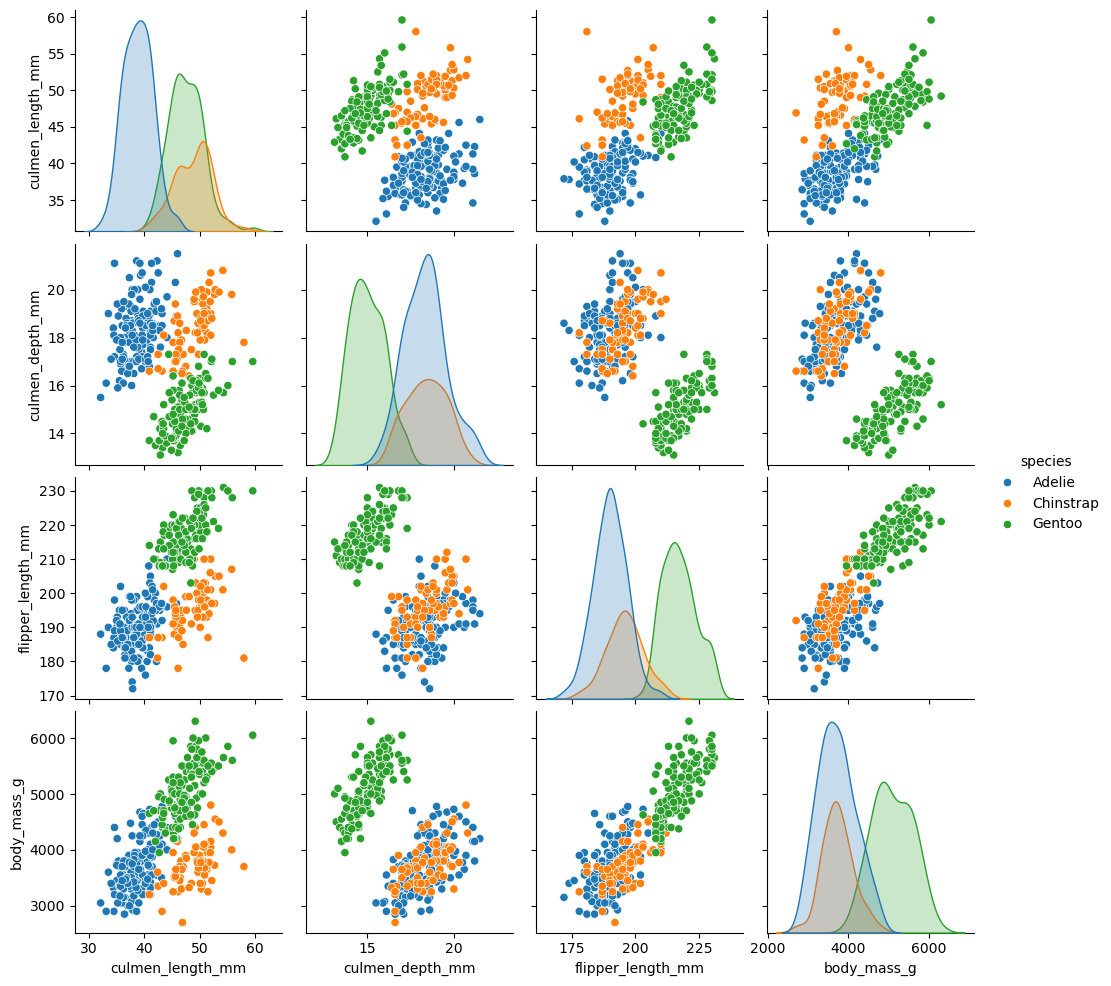

In [15]:
# Lets plot this data 

sns.pairplot(df , hue="species")

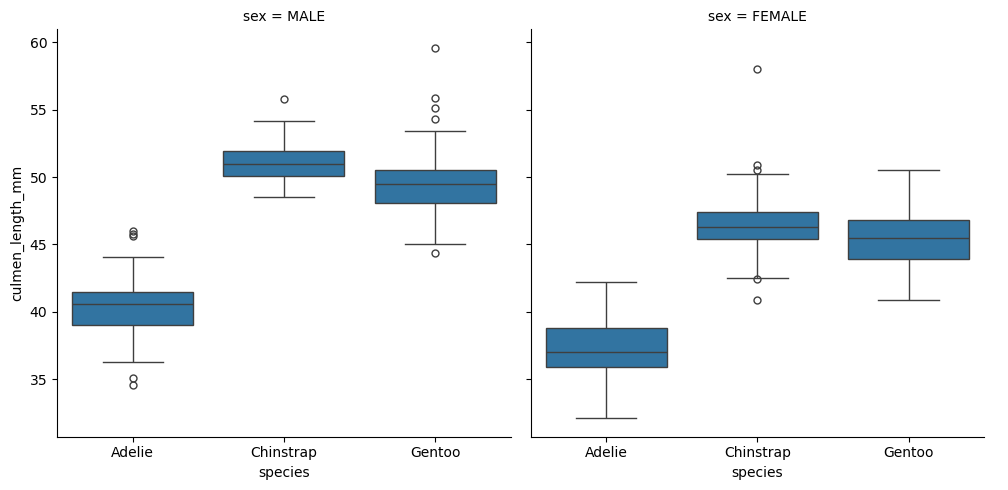

In [17]:
sns.catplot(x="species" , y="culmen_length_mm" , data=df , kind="box" , col="sex")

In [21]:
# lets define the data to work with 
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)
y= df["species"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
# lets import the model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [25]:
# fit the data 
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
base_preds = model.predict(X_test)

In [27]:
# lets check how the model did it 
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [28]:
# classification report 
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.91      0.98      0.94        41
   Chinstrap       0.95      0.83      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.95       101
   macro avg       0.95      0.93      0.94       101
weighted avg       0.95      0.95      0.95       101



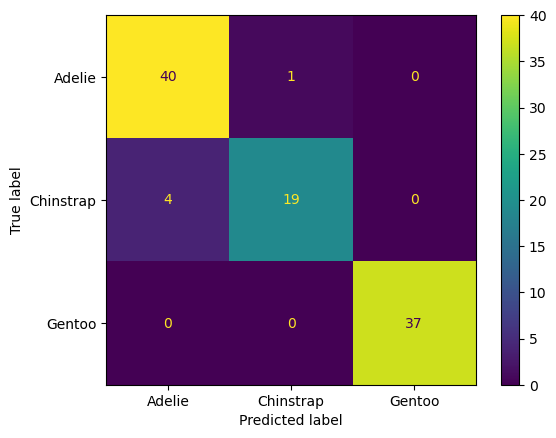

In [30]:
ConfusionMatrixDisplay.from_estimator(model, X_test , y_test)

In [33]:
# lets create a data frame to chekc the info 
pd.DataFrame(index= X.columns , data = model.feature_importances_, columns=["Feature Importance"]).sort_values("Feature Importance")

,Feature Importance
sex_MALE,0.000000
island_Torgersen,0.000000
body_mass_g,0.013251
culmen_depth_mm,0.042040
island_Dream,0.068185
culmen_length_mm,0.333695
flipper_length_mm,0.542829


In [36]:
# lets see the decision tree
from sklearn.tree import plot_tree

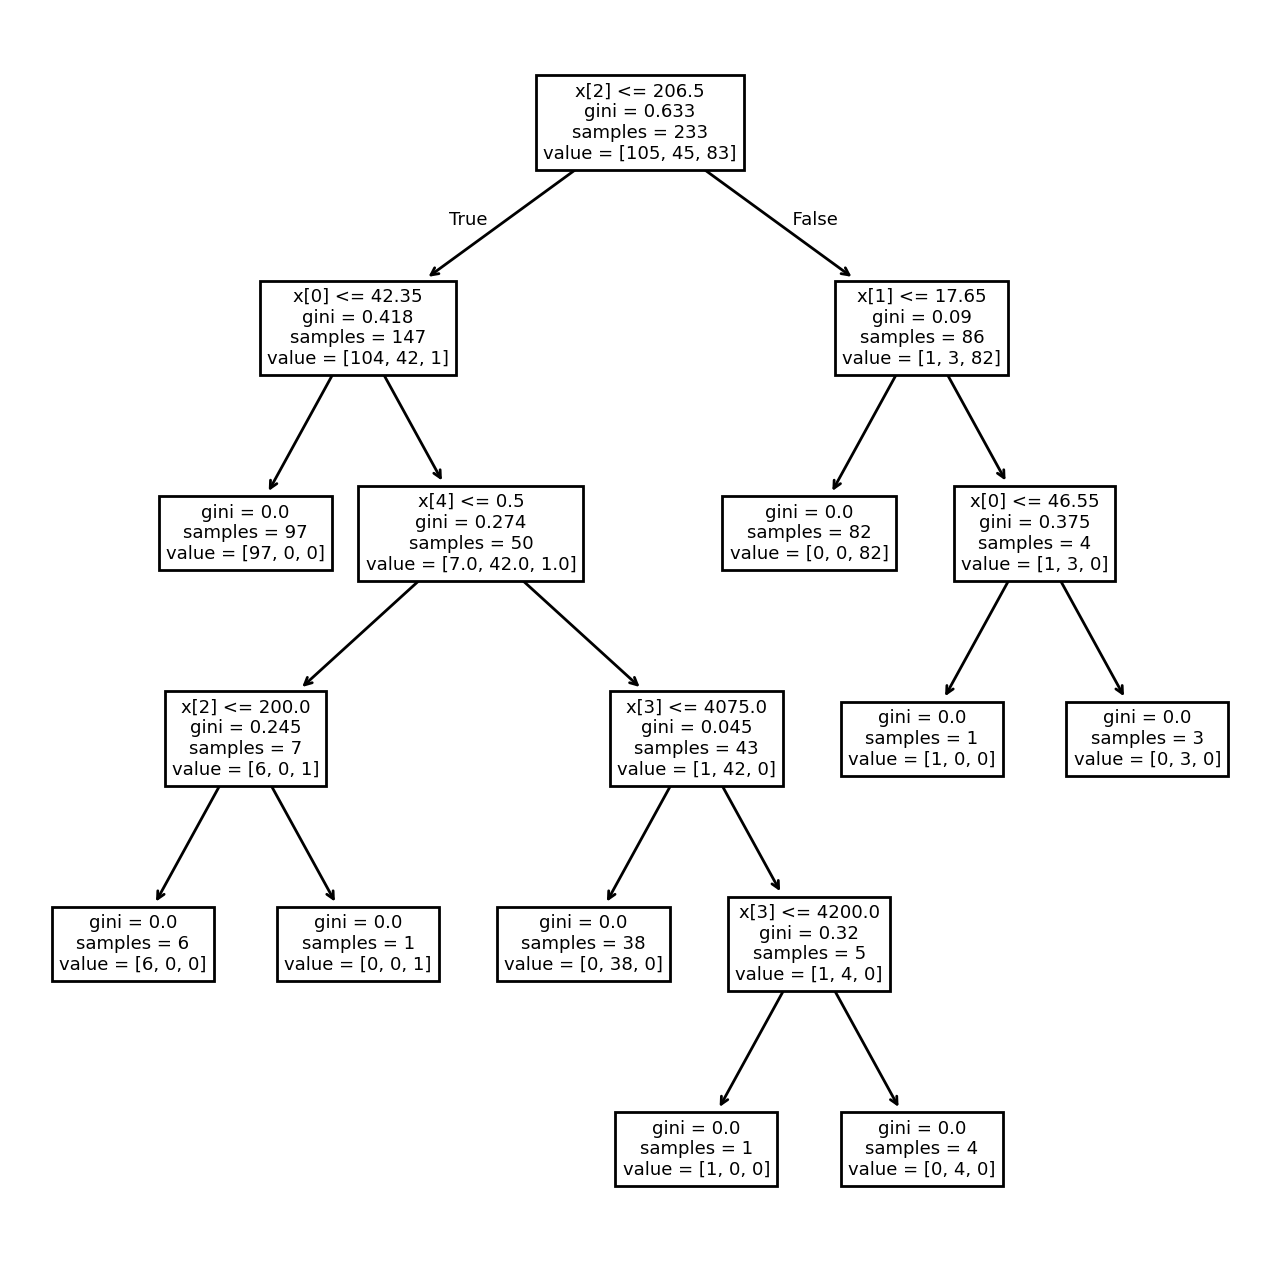

In [37]:
plt.figure(figsize=(8,8) , dpi=200)
plot_tree(model);    # to check the features in the plot add "features_names = X.columns , filled = True"

In [40]:
# create a function to always report the tree model

def report_model(model):

    """
    This function returns the plot of the decision tree  
    """

    model_preds = model.predict(X_test)
    print(classification_report(y_test, base_preds))
    print("\n")
    plt.figure(figsize=(8,8) , dpi=200)
    plot_tree(model , feature_names = X.columns , filled = True);


              precision    recall  f1-score   support

      Adelie       0.91      0.98      0.94        41
   Chinstrap       0.95      0.83      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.95       101
   macro avg       0.95      0.93      0.94       101
weighted avg       0.95      0.95      0.95       101





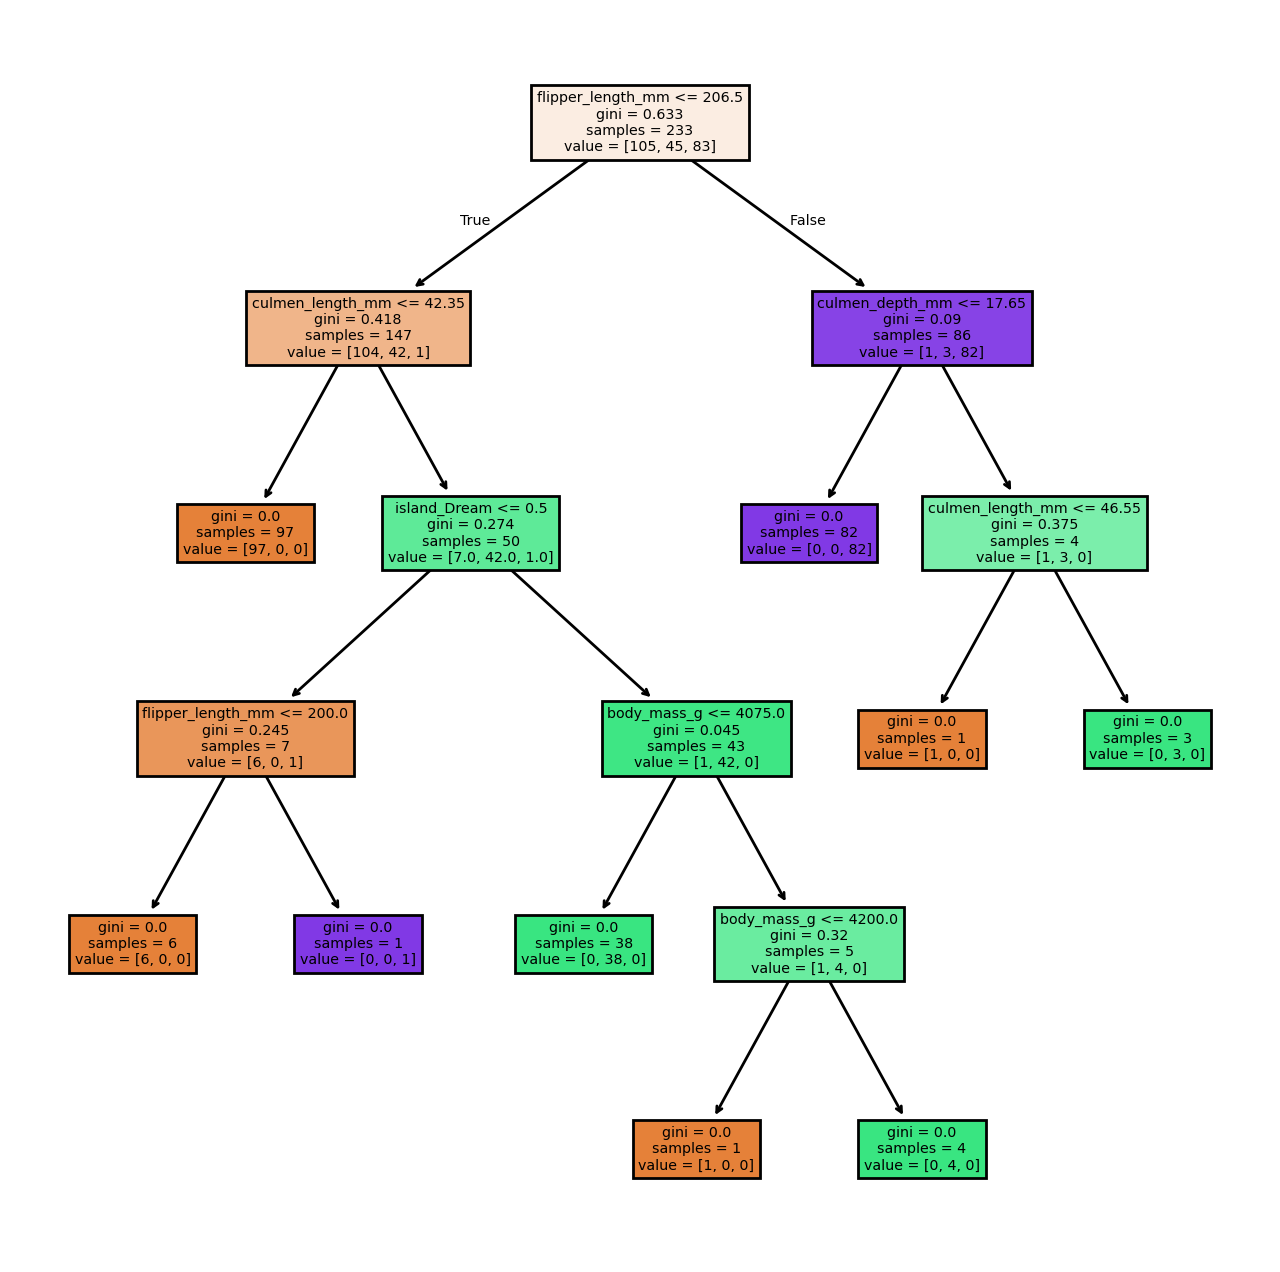

In [41]:
report_model(model)

In [43]:
# lets create  pruned model --> only two branches
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [44]:
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.91      0.98      0.94        41
   Chinstrap       0.95      0.83      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.95       101
   macro avg       0.95      0.93      0.94       101
weighted avg       0.95      0.95      0.95       101





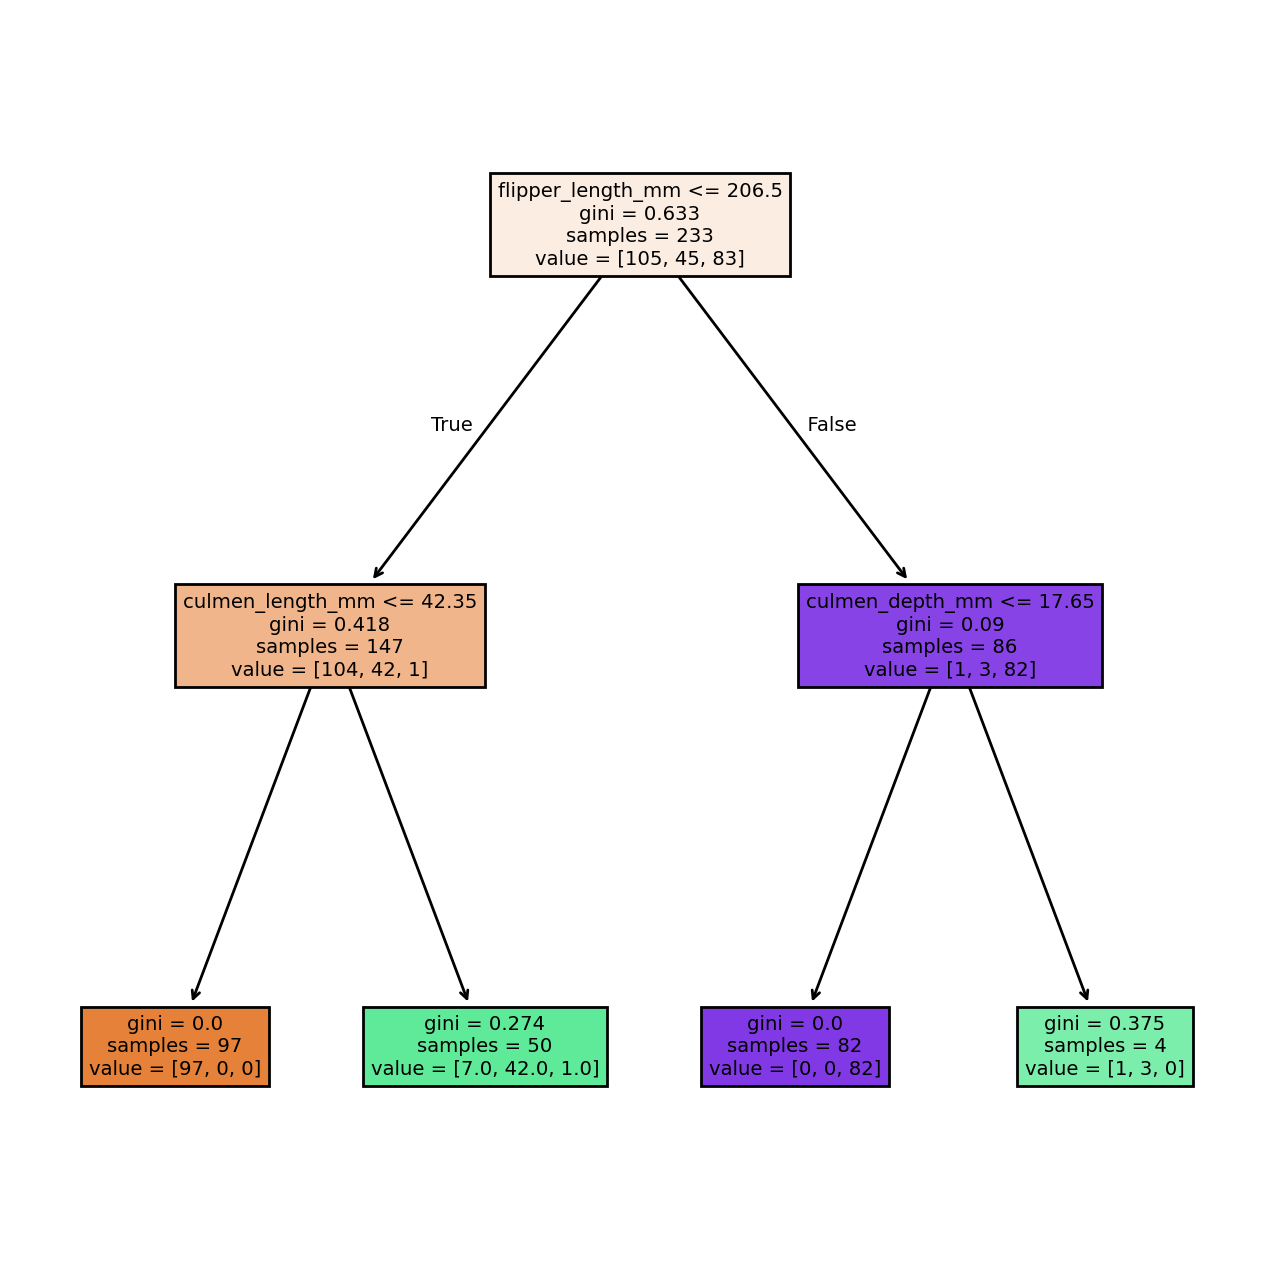

In [45]:
# call the function 
report_model(pruned_tree)

In [46]:
# lets check the maximun leaf 

max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [47]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.91      0.98      0.94        41
   Chinstrap       0.95      0.83      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.95       101
   macro avg       0.95      0.93      0.94       101
weighted avg       0.95      0.95      0.95       101





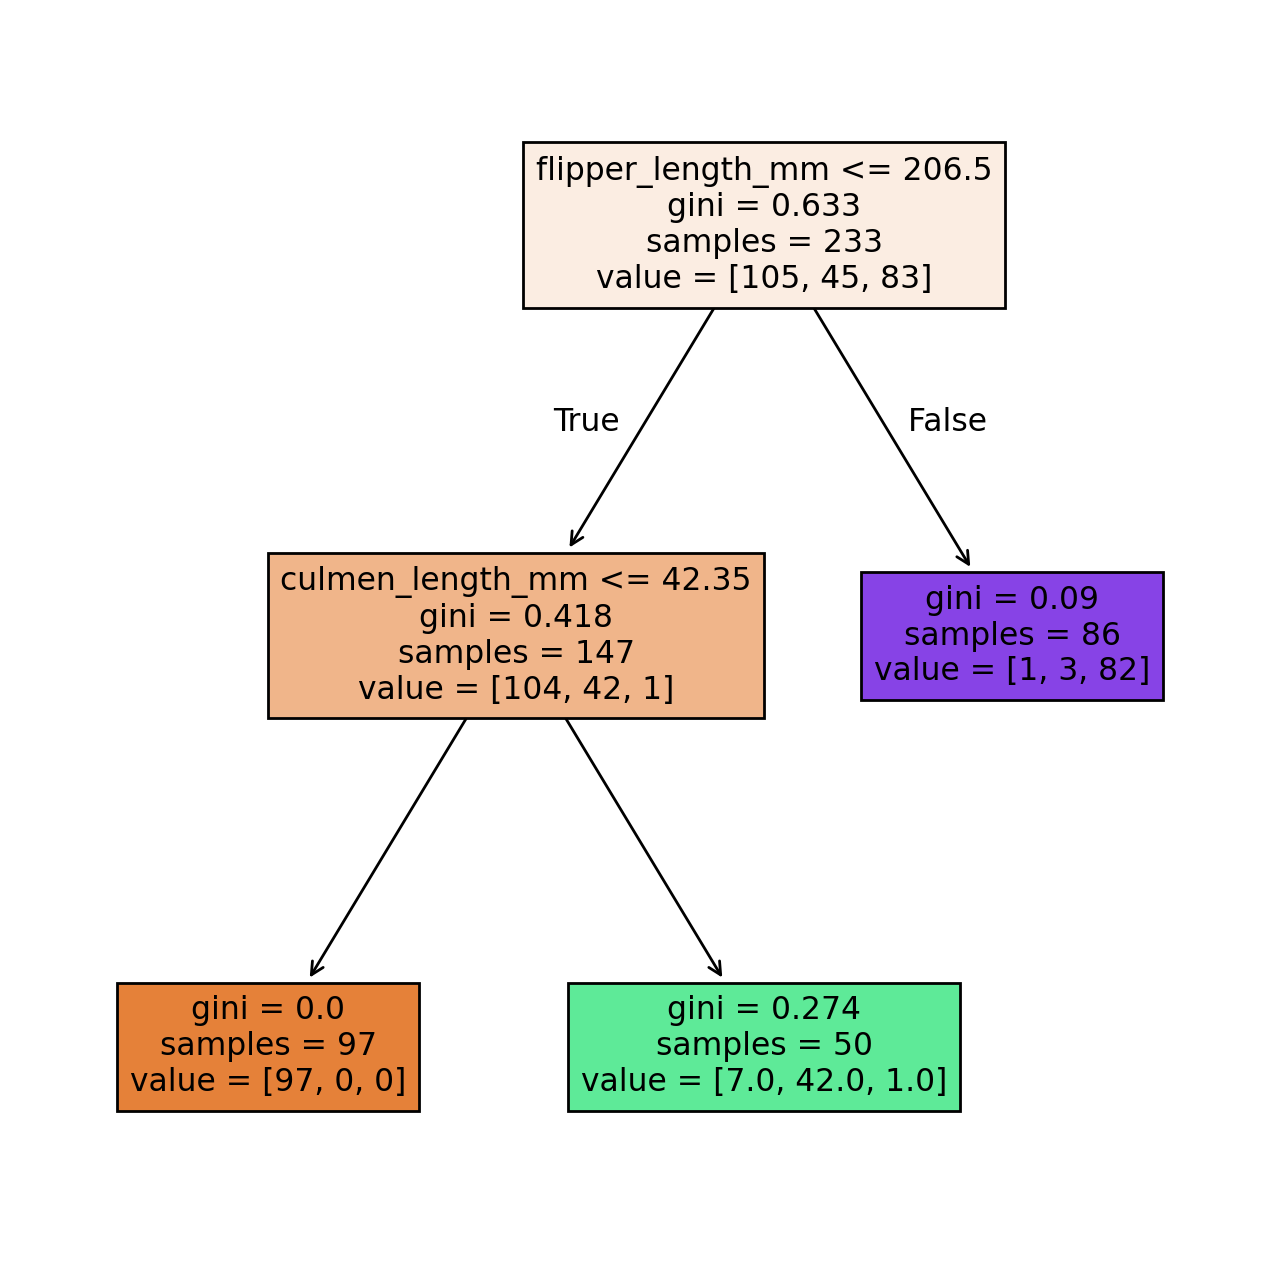

In [48]:
report_model(max_leaf_tree)

In [49]:
entropy_tree = DecisionTreeClassifier(criterion="entropy")

In [50]:
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.91      0.98      0.94        41
   Chinstrap       0.95      0.83      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.95       101
   macro avg       0.95      0.93      0.94       101
weighted avg       0.95      0.95      0.95       101





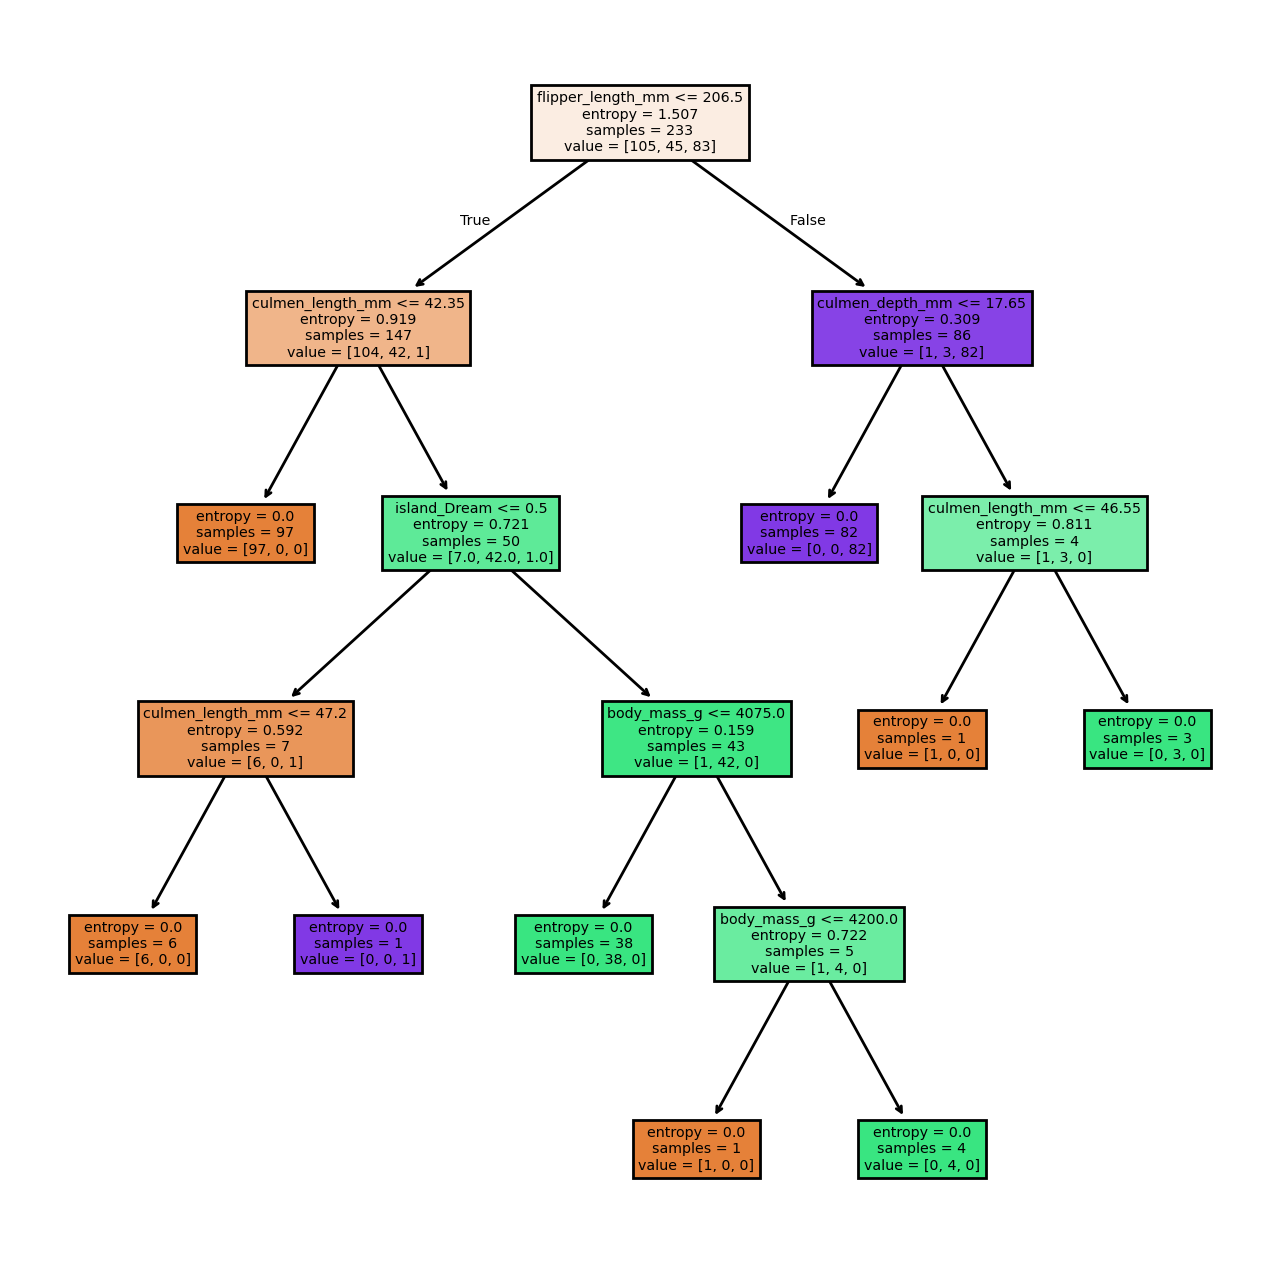

In [51]:
report_model(entropy_tree)